In [5]:
import numpy as np
import numpy.random as random
import seaborn as sns
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt

In [2]:
group1 = [84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5]
group2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5]

data = group1 + group2
groups = ['group1']*20 + ['group2']*20

DNA = pd.DataFrame({
    'data':data,
    'groups':groups
})

group1_df = pd.Series(data=group1, name='group1')
group2_df = pd.Series(data=group2, name='group2')

In [ ]:
# нахождение доверительных интервалов при допущении условия, что совокупность имеет нормальное распределение

a1 = group1_df.mean() + 3*group1_df.std()
a2 = group1_df.mean() - 3*group1_df.std()
a3 = group2_df.mean() + 3*group2_df.std()
a4 = group2_df.mean() - 3*group2_df.std()
print(a2, a1, a4, a3)

l = []
for i in group1_df:
  if i>=a2 and i<=a1:
    l.append(1)
  elif i<a2 or i>a1:
    l.append(0)
  else:
    continue

s = []
for i in group2_df:
  if i>=a4 and i<=a3:
    s.append(1)
  elif i<a4 or i>a3:
    s.append(0)
  else:
    continue

print(l, ' ', len(l), ' ', l.count(1))
print(s, ' ', len(s), ' ', s.count(1))

70.07549216227977 131.55450783772022 29.360693649676165 122.1093063503238
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   20   20
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   20   20


In [ ]:
# теорема трех сигм с использованием t-критерия

t_table = sps.t.ppf(0.975, 20)
print(t_table)

a1 = group1_df.mean() + t_table*group1_df.std()
a2 = group1_df.mean() - t_table*group1_df.std()
a3 = group2_df.mean() + t_table*group2_df.std()
a4 = group2_df.mean() - t_table*group2_df.std()
print(a2, a1, a4, a3)

l = []
for i in group1_df:
  if i>=a2 and i<=a1:
    l.append(1)
  elif i<a2 or i>a1:
    l.append(0)
  else:
    continue

print(l, ' ', len(l), ' ', l.count(1))

2.0859634472658364
79.44117008785797 122.18882991214203 43.48996402030551 107.98003597969446
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   20   20


In [ ]:
# t-критерий, p-значение

t_stat, p_value = sps.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

t = (89.9-80.7)/np.sqrt((11.3**2/20+11.7**2/20))
t

In [ ]:
# квантили распределения

quant25 = np.quantile(group1, 0.25)
quant75 = np.quantile(group1, 0.75)
quant_scope = quant75 - quant25

for i in group1:
  if i<(quant25-1.5*quant_scope) or i>(quant75+1.5*quant_scope):
    print("Выброс:", i)
  else:
    print('Выбросов нет')
    continue

<Axes: xlabel='groups', ylabel='data'>

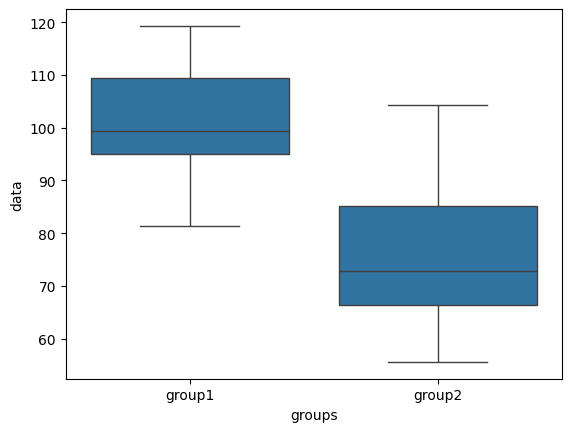

In [ ]:
# boxplots

sns.boxplot(x="groups", y='data', data=DNA)

In [ ]:
# Шапиро для выявления степени сходства ряда и нормального распределения

from scipy.stats import shapiro, kstest

res_shapiro1 = shapiro(group1)
res_shapiro2 = shapiro(group2)
print(res_shapiro1, res_shapiro2)

ShapiroResult(statistic=0.9634190949179522, pvalue=0.6141726849030309) ShapiroResult(statistic=0.9255581107669466, pvalue=0.12679716544217434)


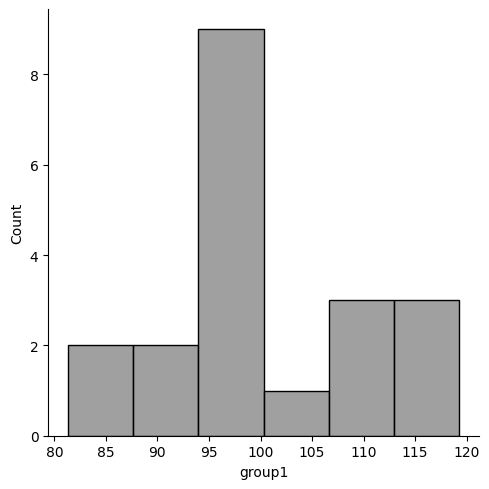

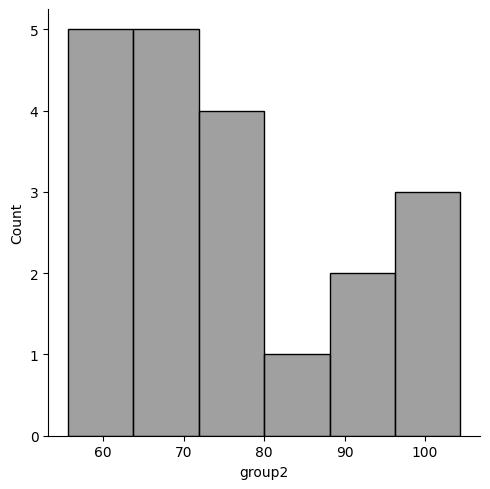

In [ ]:
# distribution

sns.displot(group1_df, color ='gray')
sns.displot(group2_df, color ='gray')

In [ ]:
# критерий Манн-Уитни

from scipy.stats import mannwhitneyu

U1, p = mannwhitneyu(group1, group2)
print(U1, p)

356.5 2.4407506516614244e-05


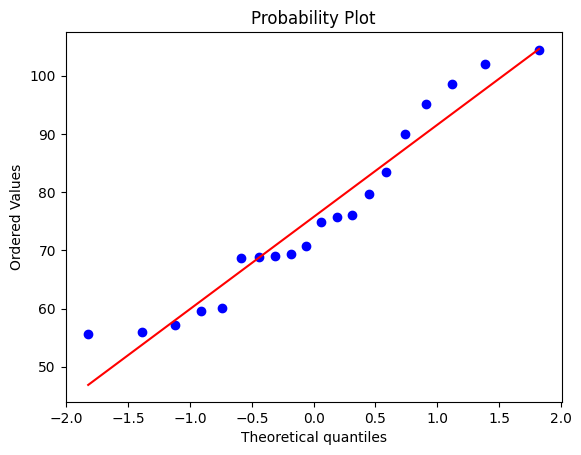

In [8]:
# QQ plot

sps.probplot(group2, dist="norm", plot=pylab)
plt.show()

In [ ]:
# Shapiro-Wilk normality test


shapiro1 = sps.shapiro(group1).statistic
shapiro2 = sps.shapiro(group2).statistic

print(shapiro1, shapiro2)

0.9634190949179522 0.9255581107669466
